# Bibliotecas

In [1382]:
# ! pip install xgboost

In [1383]:
import xgboost as xgb
import pandas as pd
import numpy as np
from sklearn.model_selection import (train_test_split,
                                     cross_val_score)
from sklearn.metrics import (mean_squared_error,
                             r2_score,
                             mean_absolute_error,
                             accuracy_score)
from sklearn.decomposition import PCA
from sklearn.preprocessing import MinMaxScaler
import seaborn as sns
from math import sqrt
import matplotlib.pyplot as plt

# Dataset

In [1384]:
df = sns.load_dataset('mpg')

df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
0,18.0,8,307.0,130.0,3504,12.0,70,usa,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,usa,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,usa,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,usa,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,usa,ford torino


É um problema regressão, pois a variável *target* 'mpg' é contínua

In [1385]:
df = df.drop(['origin', 'name'],  axis=1).copy()

In [1386]:
X = df.drop(['mpg'],  axis=1)

y = df['mpg']

In [1387]:
X.isnull().sum()

cylinders       0
displacement    0
horsepower      6
weight          0
acceleration    0
model_year      0
dtype: int64

In [1388]:
media_horsepower = np.ceil(X['horsepower'].mean())

X.loc[X['horsepower'].isnull(), 'horsepower'] = media_horsepower

In [1389]:
X.isnull().sum()

cylinders       0
displacement    0
horsepower      0
weight          0
acceleration    0
model_year      0
dtype: int64

## Split treino e teste

In [1390]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0, test_size=0.3)

# Modelos de regressão

In [1391]:
# Cross validation apenas para comparação entre modelos
reg_xgboost = xgb.XGBRegressor(objective='reg:squarederror')

resultado_cv = cross_val_score(reg_xgboost, X_train, y_train, scoring='neg_root_mean_squared_error')

print('Negative RMSE: {:.2f}'.format(abs(resultado_cv.mean())))

resultado_cv = cross_val_score(reg_xgboost, X_train, y_train, scoring='r2')

print('R^2: {:.2f}'.format(abs(resultado_cv.mean())))

resultado_cv = cross_val_score(reg_xgboost, X_train, y_train, scoring='neg_mean_absolute_error')

print('Negative MAE: {:.2f}'.format(abs(resultado_cv.mean())))

Negative RMSE: 2.96
R^2: 0.85
Negative MAE: 2.16


## Tunando o classificador

In [1392]:
reg_xgboost_depth = xgb.XGBRegressor(max_depth=2, objective='reg:squarederror') # Altera a altura máxima das árvores

resultado_cv = cross_val_score(reg_xgboost_depth, X_train, y_train, scoring='neg_root_mean_squared_error')

print('Negative RMSE: {:.2f}'.format(abs(resultado_cv.mean())))

resultado_cv = cross_val_score(reg_xgboost_depth, X_train, y_train, scoring='r2')

print('R^2: {:.2f}'.format(abs(resultado_cv.mean())))

resultado_cv = cross_val_score(reg_xgboost_depth, X_train, y_train, scoring='neg_mean_absolute_error')

print('Negative MAE: {:.2f}'.format(abs(resultado_cv.mean())))

Negative RMSE: 2.98
R^2: 0.85
Negative MAE: 2.22


In [1393]:
reg_xgboost_dart = xgb.XGBRegressor(booster='dart', objective='reg:squarederror')

resultado_cv = cross_val_score(reg_xgboost_dart, X_train, y_train, scoring='neg_root_mean_squared_error')

print('Negative RMSE: {:.2f}'.format(abs(resultado_cv.mean())))

resultado_cv = cross_val_score(reg_xgboost_dart, X_train, y_train, scoring='r2')

print('R^2: {:.2f}'.format(abs(resultado_cv.mean())))

resultado_cv = cross_val_score(reg_xgboost_dart, X_train, y_train, scoring='neg_mean_absolute_error')

print('Negative MAE: {:.2f}'.format(abs(resultado_cv.mean())))

Negative RMSE: 2.95
R^2: 0.85
Negative MAE: 2.16


In [1394]:
reg_xgboost_gblinear = xgb.XGBRegressor(booster='gblinear', objective='reg:squarederror')

resultado_cv = cross_val_score(reg_xgboost_gblinear, X_train, y_train, scoring='neg_root_mean_squared_error')

print('Negative RMSE: {:.2f}'.format(abs(resultado_cv.mean())))

resultado_cv = cross_val_score(reg_xgboost_gblinear, X_train, y_train, scoring='r2')

print('R^2: {:.2f}'.format(abs(resultado_cv.mean())))

resultado_cv = cross_val_score(reg_xgboost_gblinear, X_train, y_train, scoring='neg_mean_absolute_error')

print('Negative MAE: {:.2f}'.format(abs(resultado_cv.mean())))

Negative RMSE: 4.71
R^2: 0.62
Negative MAE: 3.66


In [1395]:
reg_xgboost_gbtree = xgb.XGBRegressor(booster='gbtree', objective='reg:squarederror')

resultado_cv = cross_val_score(reg_xgboost_gbtree, X_train, y_train, scoring='neg_root_mean_squared_error')

print('Negative RMSE: {:.2f}'.format(abs(resultado_cv.mean())))

resultado_cv = cross_val_score(reg_xgboost_gbtree, X_train, y_train, scoring='r2')

print('R^2: {:.2f}'.format(abs(resultado_cv.mean())))

resultado_cv = cross_val_score(reg_xgboost_gbtree, X_train, y_train, scoring='neg_mean_absolute_error')

print('Negative MAE: {:.2f}'.format(abs(resultado_cv.mean())))

Negative RMSE: 2.96
R^2: 0.85
Negative MAE: 2.16


# Aplicação do melhor modelo

In [1396]:
melhor_modelo = reg_xgboost_depth

melhor_modelo.fit(X_train, y_train)

XGBRegressor(max_depth=2, objective='reg:squarederror')

In [1397]:
y_pred = melhor_modelo.predict(X_test)

## Acurácia

In [1398]:
rmse = sqrt(mean_squared_error(y_test, y_pred))

r_squared = r2_score(y_test, y_pred)

mae = mean_absolute_error(y_test, y_pred)

print('RMSE = {} \
       R^2 = {} \
       MAE = {}'.format(rmse,
                        r_squared,
                        mae))

RMSE = 2.7669990872511026        R^2 = 0.8801868797494703        MAE = 1.9576423056920371


In [1399]:
y_pred_all = melhor_modelo.predict(X)

# Uso do neg para buscar o erro "quanto menor, melhor"
# Caso contrário, o scikit-learn vai maximizar o erro, trazendo o maior valor, neste caso "quanto maior, pior", o que é indesejado

abs(resultado_cv.mean())
df['mpg_pred'] = y_pred_all

df['mpg_pred'] = df['mpg_pred'].round(2)

In [1400]:
rmse = sqrt(mean_squared_error(y, y_pred_all))

r_squared = r2_score(y, y_pred_all)

mae = mean_absolute_error(y, y_pred_all)

print('RMSE = {} \
       R^2 = {} \
       MAE = {}'.format(rmse,
                        r_squared,
                        mae))

RMSE = 2.2488827388951997        R^2 = 0.9170036813595113        MAE = 1.64128475620519


# Conversões de unidades

In [1433]:
mpg_para_kml = 0.425144

df['km_l'] = round(df['mpg'] * mpg_para_kml, 2)

df['km_l_pred'] = round(df['mpg_pred'] * mpg_para_kml, 2)


libras_para_kg = 0.453592

df['kg'] = round(df['weight'] * libras_para_kg, 2)

In [1435]:
reorder_columns = ['mpg',
                   'km_l',
                   'mpg_pred',
                   'km_l_pred',
                   'cylinders',
                   'displacement',
                   'horsepower',
                   'weight',
                   'kg',
                   'acceleration',
                   'model_year']

df = df.reindex(columns=reorder_columns, copy=True)

df

,mpg,km_l,mpg_pred,km_l_pred,cylinders,displacement,horsepower,weight,kg,acceleration,model_year
0,18.0,7.65,16.430000,6.99,8,307.0,130.0,3504,1589.39,12.0,70
1,15.0,6.38,15.570000,6.62,8,350.0,165.0,3693,1675.12,11.5,70
2,18.0,7.65,15.980000,6.79,8,318.0,150.0,3436,1558.54,11.0,70
3,16.0,6.80,15.480000,6.58,8,304.0,150.0,3433,1557.18,12.0,70
4,17.0,7.23,16.340000,6.95,8,302.0,140.0,3449,1564.44,10.5,70
...,...,...,...,...,...,...,...,...,...,...,...
393,27.0,11.48,27.080000,11.51,4,140.0,86.0,2790,1265.52,15.6,82
394,44.0,18.71,41.950001,17.83,4,97.0,52.0,2130,966.15,24.6,82
395,32.0,13.60,32.360001,13.76,4,135.0,84.0,2295,1040.99,11.6,82
396,28.0,11.90,29.090000,12.37,4,120.0,79.0,2625,1190.68,18.6,82


# Análise gráfica

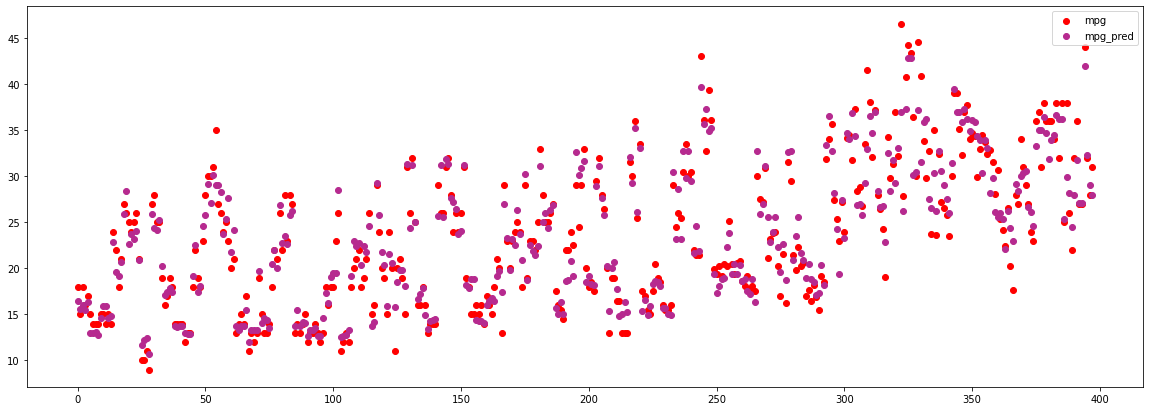

In [1403]:
plt.figure(figsize=(20, 7))

plt.scatter(y=df['mpg'], x=df.index, color='#FF0000', label='mpg')
plt.scatter(y=df['mpg_pred'], x=df.index, color='#B62A8F', label='mpg_pred')

plt.legend()

# Normalização dos dados

In [1404]:
scaler = MinMaxScaler()

X_scaled = scaler.fit_transform(X)

# Principal Component Analysis (PCA)

In [1405]:
pca = PCA(n_components=6)

X_scaled_pca = pca.fit_transform(X_scaled)

pca.components_ # Em cada linha é dado os coeficientes de uma componente principal (n_components)
# Coeficientes da combinação das variáveis originais que dão origem às componentes principais

array([[ 0.60110803,  0.48239617,  0.35185088,  0.40957412, -0.17726723,
        -0.28807879],
       [-0.20601297, -0.14236448, -0.03835856, -0.1737575 , -0.0173295 ,
        -0.95148707],
       [ 0.21092234,  0.04934411, -0.34343919,  0.23757095,  0.87691057,
        -0.09856141],
       [ 0.65357171, -0.06281401, -0.45548016, -0.57450958, -0.17704103,
        -0.00560893],
       [ 0.21166047, -0.27591536,  0.74084626, -0.43270892,  0.37623776,
         0.03775601],
       [-0.28245959,  0.81517885,  0.02153467, -0.47782753,  0.16249769,
         0.02261922]])

In [1406]:
pca.explained_variance_ratio_.round(3)

array([0.72 , 0.189, 0.053, 0.024, 0.008, 0.007])

* A primeira componente principal explica 72% da variabilidade dos dados
* A segunda componente principal explica 18,9% da variabilidade dos dados

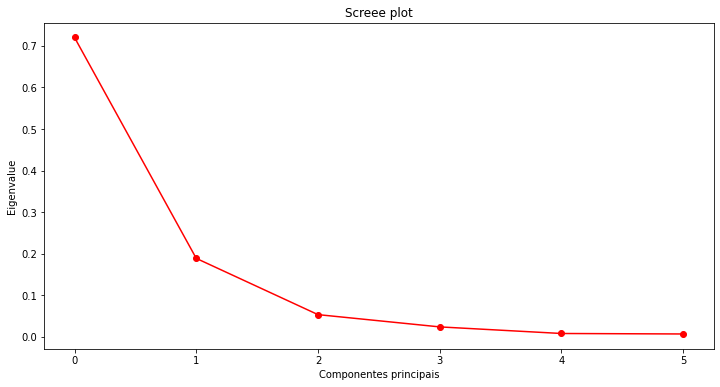

In [1407]:
fig = plt.figure(figsize=(12, 6))

plt.plot(pca.explained_variance_ratio_, 'ro-')
plt.title('Screee plot')
plt.xlabel('Componentes principais')
plt.ylabel('Eigenvalue')

plt.show()

In [1408]:
pca = PCA(n_components=2)

X_scaled_pca_two_comp = pca.fit_transform(X_scaled)

pca_componentes = pca.components_.round(3)

pca_componentes

array([[ 0.601,  0.482,  0.352,  0.41 , -0.177, -0.288],
       [-0.206, -0.142, -0.038, -0.174, -0.017, -0.951]])

In [1409]:
pca_1 = pca.transform(X)[:, 0]

pca_2 = pca.transform(X)[:, 1]

/usr/local/lib/python3.8/dist-packages/sklearn/base.py:443: UserWarning: X has feature names, but PCA was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/base.py:443: UserWarning: X has feature names, but PCA was fitted without feature names
  warnings.warn(


In [1410]:
df_scaled = pd.DataFrame(data=X_scaled_pca_two_comp)

df_scaled

,0,1
0,0.740258,0.301964
1,0.888009,0.270054
2,0.794869,0.298129
3,0.766518,0.302396
4,0.762588,0.305975
...,...,...
393,-0.441910,-0.382645
394,-0.732133,-0.336507
395,-0.467243,-0.351876
396,-0.531042,-0.368794


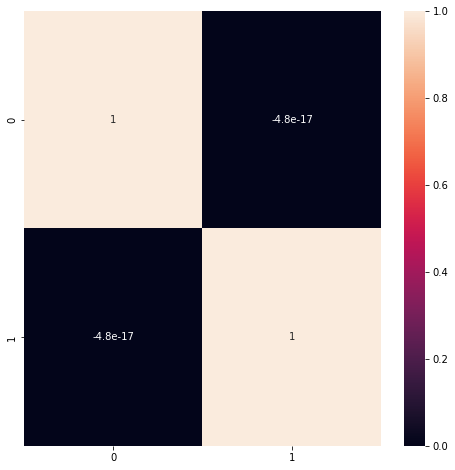

In [1411]:
ax = sns.heatmap(df_scaled.corr(), annot=True)

ax.figure.set_size_inches(8, 8)

## Split treino e teste

In [1412]:
X_train_new, X_test_new, y_train, y_test = train_test_split(X_scaled_pca_two_comp, y, random_state=0, test_size=0.3)

# Modelos de regressão

In [1413]:
# Cross validation apenas para comparação entre modelos
reg_xgboost = xgb.XGBRegressor(objective='reg:squarederror')

resultado_cv = cross_val_score(reg_xgboost, X_train_new, y_train, scoring='neg_root_mean_squared_error')

print('Negative RMSE: {:.2f}'.format(abs(resultado_cv.mean())))

resultado_cv = cross_val_score(reg_xgboost, X_train_new, y_train, scoring='r2')

print('R^2: {:.2f}'.format(abs(resultado_cv.mean())))

resultado_cv = cross_val_score(reg_xgboost, X_train_new, y_train, scoring='neg_mean_absolute_error')

print('Negative MAE: {:.2f}'.format(abs(resultado_cv.mean())))

Negative RMSE: 3.15
R^2: 0.83
Negative MAE: 2.35


## Tunando o classificador

In [1414]:
reg_xgboost_depth = xgb.XGBRegressor(max_depth=2, objective='reg:squarederror') # Altera a altura máxima das árvores

resultado_cv = cross_val_score(reg_xgboost_depth, X_train_new, y_train, scoring='neg_root_mean_squared_error')

print('Negative RMSE: {:.2f}'.format(abs(resultado_cv.mean())))

resultado_cv = cross_val_score(reg_xgboost_depth, X_train_new, y_train, scoring='r2')

print('R^2: {:.2f}'.format(abs(resultado_cv.mean())))

resultado_cv = cross_val_score(reg_xgboost_depth, X_train_new, y_train, scoring='neg_mean_absolute_error')

print('Negative MAE: {:.2f}'.format(abs(resultado_cv.mean())))

Negative RMSE: 3.04
R^2: 0.84
Negative MAE: 2.25


In [1415]:
reg_xgboost_dart = xgb.XGBRegressor(booster='dart', objective='reg:squarederror')

resultado_cv = cross_val_score(reg_xgboost_dart, X_train_new, y_train, scoring='neg_root_mean_squared_error')

print('Negative RMSE: {:.2f}'.format(abs(resultado_cv.mean())))

resultado_cv = cross_val_score(reg_xgboost_dart, X_train_new, y_train, scoring='r2')

print('R^2: {:.2f}'.format(abs(resultado_cv.mean())))

resultado_cv = cross_val_score(reg_xgboost_dart, X_train_new, y_train, scoring='neg_mean_absolute_error')

print('Negative MAE: {:.2f}'.format(abs(resultado_cv.mean())))

Negative RMSE: 3.15
R^2: 0.83
Negative MAE: 2.35


In [1416]:
reg_xgboost_gblinear = xgb.XGBRegressor(booster='gblinear', objective='reg:squarederror')

resultado_cv = cross_val_score(reg_xgboost_gblinear, X_train_new, y_train, scoring='neg_root_mean_squared_error')

print('Negative RMSE: {:.2f}'.format(abs(resultado_cv.mean())))

resultado_cv = cross_val_score(reg_xgboost_gblinear, X_train_new, y_train, scoring='r2')

print('R^2: {:.2f}'.format(abs(resultado_cv.mean())))

resultado_cv = cross_val_score(reg_xgboost_gblinear, X_train_new, y_train, scoring='neg_mean_absolute_error')

print('Negative MAE: {:.2f}'.format(abs(resultado_cv.mean())))

Negative RMSE: 6.49
R^2: 0.29
Negative MAE: 5.39


In [1417]:
reg_xgboost_gbtree = xgb.XGBRegressor(booster='gbtree', objective='reg:squarederror')

resultado_cv = cross_val_score(reg_xgboost_gbtree, X_train_new, y_train, scoring='neg_root_mean_squared_error')

print('Negative RMSE: {:.2f}'.format(abs(resultado_cv.mean())))

resultado_cv = cross_val_score(reg_xgboost_gbtree, X_train_new, y_train, scoring='r2')

print('R^2: {:.2f}'.format(abs(resultado_cv.mean())))

resultado_cv = cross_val_score(reg_xgboost_gbtree, X_train_new, y_train, scoring='neg_mean_absolute_error')

print('Negative MAE: {:.2f}'.format(abs(resultado_cv.mean())))

Negative RMSE: 3.15
R^2: 0.83
Negative MAE: 2.35


# Previsão de mpg

In [1436]:
# Recebe dados do usário

cylinders = input('\nNúmero de cilindros (entre {:.2f} e {:.2f})\n'.format(df['cylinders'].min(), df['cylinders'].max()))

displacement = input('\nkm rodados (entre {:.2f} e {:.2f})\n'.format(df['displacement'].min(), df['displacement'].max()))

horsepower = input('\nPotência (entre {:.2f} e {:.2f} hp)\n'.format(df['horsepower'].min(), df['horsepower'].max()))

weight = input('\nPeso (entre {:.2f} e {:.2f} kg)\n'.format(df['kg'].min(), df['kg'].max()))

acceleration = input('\nAceleração 0 até 100 km/h (entre {:.2f} e {:.2f} s)\n'.format(df['acceleration'].min(), df['acceleration'].max()))

model_year = input('\nAno (entre {:.0f} e {:.0f})\n'.format(df['model_year'].min(), df['model_year'].max()))


Número de cilindros (entre 3.00 e 8.00)
7

km rodados (entre 68.00 e 455.00)
300

Potência (entre 46.00 e 230.00 hp)
140

Peso (entre 731.64 e 2331.46 kg)
760

Aceleração 0 até 100 km/h (entre 8.00 e 24.80 s)
12

Ano (entre 70 e 82)
76


In [1438]:
dados_usuario = {'cylinders': cylinders,
                 'displacement': displacement,
                 'horsepower': horsepower,
                 'weight': weight,
                 'acceleration': acceleration,
                 'model_year': model_year}

In [1439]:
df_usuario = pd.DataFrame(dados_usuario, dtype='float64', index=[0])

y_user_pred = melhor_modelo.predict(df_usuario)

df_usuario['mpg_pred'] = y_user_pred[0].round(2)

df_usuario

,cylinders,displacement,horsepower,weight,acceleration,model_year,mpg_pred
0,7.0,300.0,140.0,760.0,12.0,76.0,26.08
